In [2]:
import pandas as pd

# Load the dataset to examine its structure and contents
data = pd.read_excel("/content/physician_visit_costs_v2.xlsx")
data

,State,State Code,county,Specialities,avg_medicare_new_patient,avg_copay_new_patient,mode_medicare_new_patient,mode_copay_new_patient,avg_medicare_established_patient,avg_copay_established_patient,mode_copay_established_patient,mode_medicare_established_patient
0,Alaska,AK,Aleutians East Borough,Addiction Medicine,154.22,38.56,176.47,44.12,106.56,26.64,33.96,135.85
1,Alaska,AK,Aleutians East Borough,Advanced Heart Failure And Transplant Cardiology,154.22,38.56,176.47,44.12,106.56,26.64,33.96,135.85
2,Alaska,AK,Aleutians East Borough,Allergy Immunology,154.22,38.56,176.47,44.12,106.56,26.64,23.79,95.16
3,Alaska,AK,Aleutians East Borough,Cardiac Surgery,154.22,38.56,176.47,44.12,106.56,26.64,33.96,135.85
4,Alaska,AK,Aleutians East Borough,Cardiology,154.22,38.56,176.47,44.12,106.56,26.64,33.96,135.85
...,...,...,...,...,...,...,...,...,...,...,...,...
210043,Wyoming,WY,Weston,Thoracic Surgery,118.44,29.61,178.11,44.53,82.00,20.50,18.38,73.53
210044,Wyoming,WY,Weston,Undersea And Hyperbaric Medicine,118.44,29.61,90.34,22.58,82.00,20.50,18.38,73.53
210045,Wyoming,WY,Weston,Unknown Supplier Provider Specialty,118.44,29.61,90.34,22.58,82.00,20.50,26.08,104.34
210046,Wyoming,WY,Weston,Urology,118.44,29.61,134.92,33.73,82.00,20.50,18.38,73.53


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210048 entries, 0 to 210047
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   State                              210048 non-null  int64  
 1   State Code                         210048 non-null  int8   
 2   county                             210048 non-null  int16  
 3   Specialities                       210048 non-null  int8   
 4   avg_medicare_new_patient           210048 non-null  float64
 5   avg_copay_new_patient              210048 non-null  float64
 6   mode_medicare_new_patient          210048 non-null  float64
 7   mode_copay_new_patient             210048 non-null  float64
 8   avg_medicare_established_patient   210048 non-null  float64
 9   avg_copay_established_patient      210048 non-null  float64
 10  mode_copay_established_patient     210048 non-null  float64
 11  mode_medicare_established_patient  2100

In [3]:
data.head()

,State,State Code,county,Specialities,avg_medicare_new_patient,avg_copay_new_patient,mode_medicare_new_patient,mode_copay_new_patient,avg_medicare_established_patient,avg_copay_established_patient,mode_copay_established_patient,mode_medicare_established_patient
0,Alaska,AK,Aleutians East Borough,Addiction Medicine,154.22,38.56,176.47,44.12,106.56,26.64,33.96,135.85
1,Alaska,AK,Aleutians East Borough,Advanced Heart Failure And Transplant Cardiology,154.22,38.56,176.47,44.12,106.56,26.64,33.96,135.85
2,Alaska,AK,Aleutians East Borough,Allergy Immunology,154.22,38.56,176.47,44.12,106.56,26.64,23.79,95.16
3,Alaska,AK,Aleutians East Borough,Cardiac Surgery,154.22,38.56,176.47,44.12,106.56,26.64,33.96,135.85
4,Alaska,AK,Aleutians East Borough,Cardiology,154.22,38.56,176.47,44.12,106.56,26.64,33.96,135.85


In [45]:
# Re-import necessary libraries for encoding and model fitting
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Re-encode categorical features correctly
for column in ['State', 'county', 'Specialities']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Redefine features and target
X = data.drop([
    'avg_medicare_new_patient', 'avg_copay_new_patient',
    'mode_medicare_new_patient', 'mode_copay_new_patient',
    'avg_medicare_established_patient', 'avg_copay_established_patient',
    'mode_copay_established_patient', 'mode_medicare_established_patient'
], axis=1)
y = data['avg_medicare_new_patient']

# Split the dataset into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
models = [LinearRegression(), DecisionTreeRegressor(random_state=42), RandomForestRegressor(random_state=42)]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
results = {}

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R2': r2}

print(results)


{'Linear Regression': {'MSE': 36.13464856949562, 'R2': 0.0036272015580091077}, 'Decision Tree': {'MSE': 2.7841771076482406e-23, 'R2': 1.0}, 'Random Forest': {'MSE': 4.684435092114015e-24, 'R2': 1.0}}


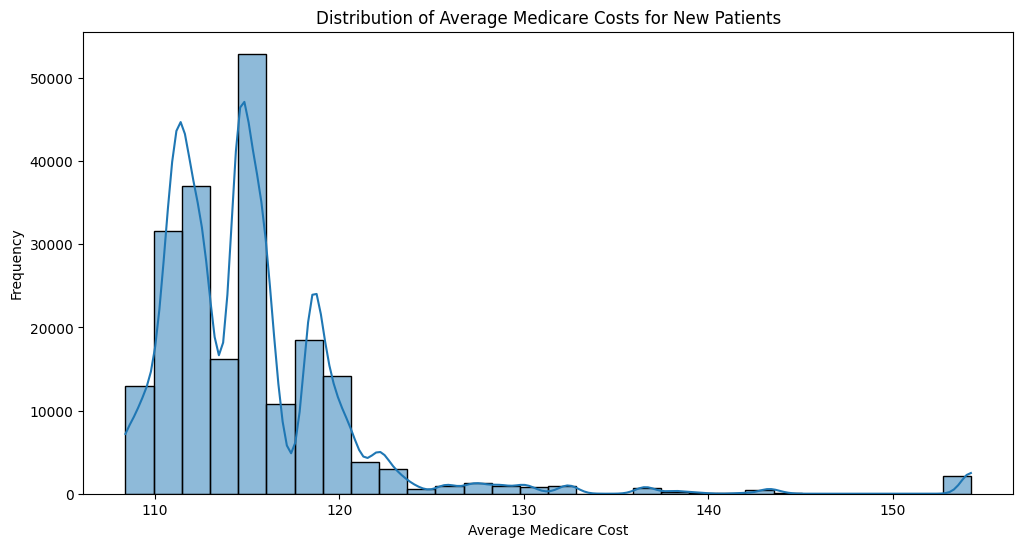

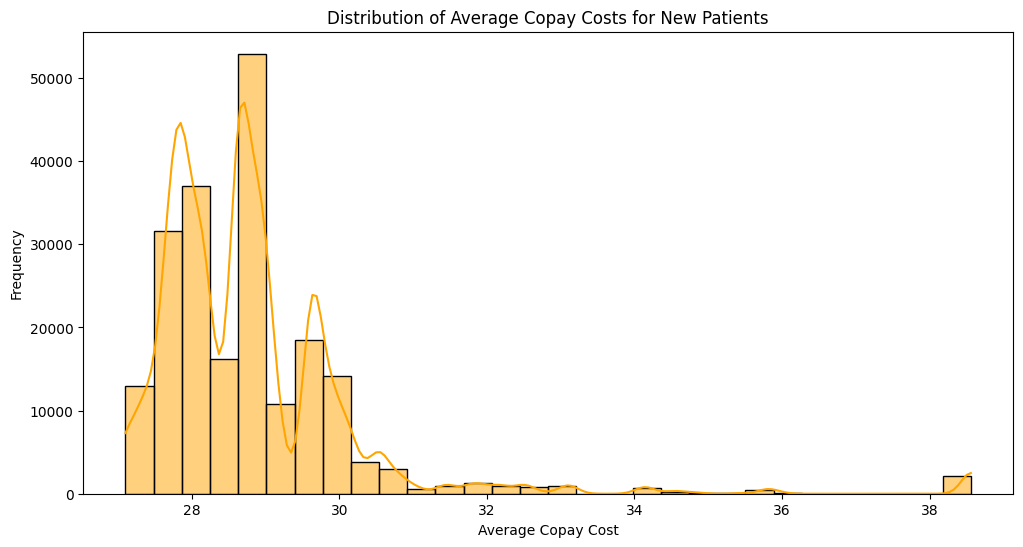

In [8]:
# Re-import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Quick statistical summary to understand the distributions of numerical features
desc_stats = data.describe()

# Visualize the distribution of average Medicare costs for new patients
plt.figure(figsize=(12, 6))
sns.histplot(data['avg_medicare_new_patient'], bins=30, kde=True)
plt.title('Distribution of Average Medicare Costs for New Patients')
plt.xlabel('Average Medicare Cost')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of average copay costs for new patients
plt.figure(figsize=(12, 6))
sns.histplot(data['avg_copay_new_patient'], bins=30, kde=True, color='orange')
plt.title('Distribution of Average Copay Costs for New Patients')
plt.xlabel('Average Copay Cost')
plt.ylabel('Frequency')
plt.show()



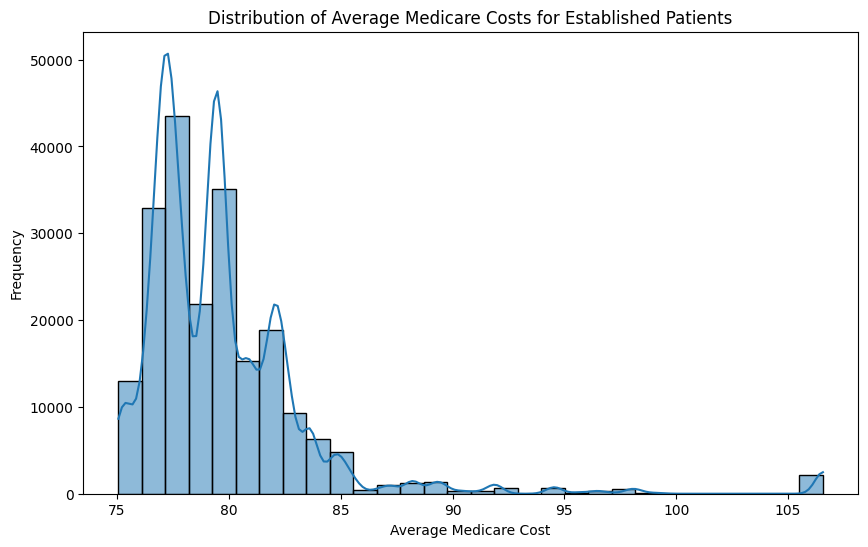

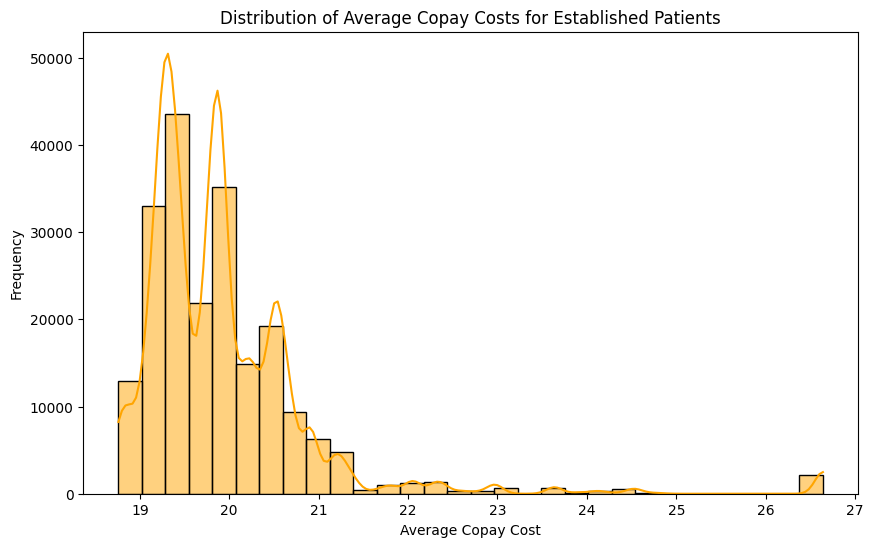

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded the dataset into a DataFrame named 'data'

# Calculate descriptive statistics for established patients
desc_stats_established = data[['avg_medicare_established_patient', 'avg_copay_established_patient']].describe()

# Distribution of average Medicare costs for established patients
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_medicare_established_patient'], bins=30, kde=True)
plt.title('Distribution of Average Medicare Costs for Established Patients')
plt.xlabel('Average Medicare Cost')
plt.ylabel('Frequency')
plt.show()

# Distribution of average copay costs for established patients
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_copay_established_patient'], bins=30, kde=True, color='orange')
plt.title('Distribution of Average Copay Costs for Established Patients')
plt.xlabel('Average Copay Cost')
plt.ylabel('Frequency')
plt.show()




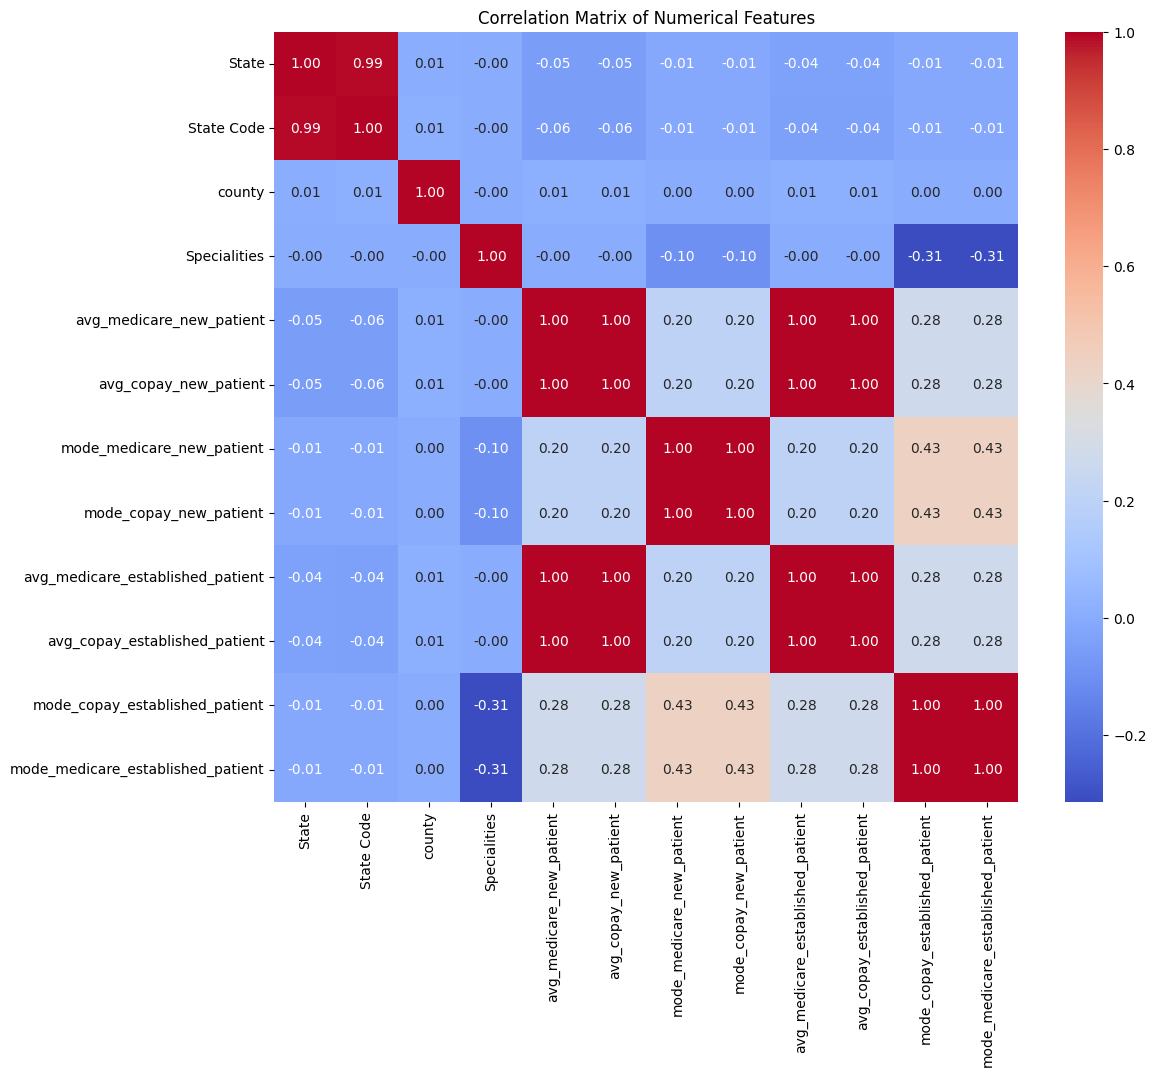

,State,State Code,county,Specialities,avg_medicare_new_patient,avg_copay_new_patient,mode_medicare_new_patient,mode_copay_new_patient,avg_medicare_established_patient,avg_copay_established_patient,mode_copay_established_patient,mode_medicare_established_patient
count,210048.000000,210048.000000,210048.000000,210048.000000,210048.000000,210048.000000,210048.000000,210048.000000,210048.000000,210048.000000,210048.000000,210048.000000
mean,26.879647,26.659049,1003.368373,31.500000,115.278630,28.819239,125.665160,31.416316,79.744500,19.936773,22.363971,89.456544
std,14.588597,14.515397,562.537529,18.472997,5.996886,1.499817,32.522715,8.130833,4.143624,1.036020,4.212678,16.852015
min,0.000000,0.000000,0.000000,0.000000,108.400000,27.100000,82.310000,20.580000,75.060000,18.760000,16.790000,67.140000
25%,15.000000,15.000000,523.000000,15.750000,111.570000,27.890000,88.620000,22.150000,77.320000,19.330000,17.810000,71.240000
50%,26.000000,26.000000,1002.500000,31.500000,114.600000,28.650000,128.380000,32.090000,79.210000,19.800000,24.460000,97.850000
75%,41.000000,41.000000,1467.000000,47.250000,116.400000,29.100000,138.560000,34.640000,80.990000,20.250000,25.300000,101.200000
max,51.000000,51.000000,2004.000000,63.000000,154.220000,38.560000,233.630000,58.410000,106.560000,26.640000,47.690000,190.740000


In [10]:
# Plotting the correlation matrix to see if any strong correlations exist between the numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Return the descriptive statistics for further textual analysis
desc_stats

In [38]:
# Load the full dataset to apply the filtering for California
data_full = pd.read_excel("/content/physician_visit_costs_v2.xlsx")

# Filter the dataset for entries where the State is 'California'
california_data = data_full[data_full['State'] == 'California']

# Display the first few rows to confirm the filtering and provide basic information
california_data.head(), california_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3712 entries, 12224 to 15935
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   State                              3712 non-null   object 
 1   State Code                         3712 non-null   object 
 2   county                             3712 non-null   object 
 3   Specialities                       3712 non-null   object 
 4   avg_medicare_new_patient           3712 non-null   float64
 5   avg_copay_new_patient              3712 non-null   float64
 6   mode_medicare_new_patient          3712 non-null   float64
 7   mode_copay_new_patient             3712 non-null   float64
 8   avg_medicare_established_patient   3712 non-null   float64
 9   avg_copay_established_patient      3712 non-null   float64
 10  mode_copay_established_patient     3712 non-null   float64
 11  mode_medicare_established_patient  3712 non-null   float

(            State State Code   county  \
 12224  California         CA  Alameda   
 12225  California         CA  Alameda   
 12226  California         CA  Alameda   
 12227  California         CA  Alameda   
 12228  California         CA  Alameda   
 
                                            Specialities  \
 12224                                Addiction Medicine   
 12225  Advanced Heart Failure And Transplant Cardiology   
 12226                                Allergy Immunology   
 12227                                   Cardiac Surgery   
 12228                                        Cardiology   
 
        avg_medicare_new_patient  avg_copay_new_patient  \
 12224                    138.15                  34.54   
 12225                    138.15                  34.54   
 12226                    138.15                  34.54   
 12227                    138.15                  34.54   
 12228                    138.15                  34.54   
 
        mode_medicare_new_pa

In [ ]:
#because it is highly populated and also because our data was huge

In [49]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Encode categorical data
data['State'] = data['State'].astype('category').cat.codes
data['county'] = data['county'].astype('category').cat.codes
data['Specialities'] = data['Specialities'].astype('category').cat.codes

# Prepare features and target
X = data[['State', 'county', 'Specialities']]
y = data['avg_medicare_new_patient']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}, R2: {r2}')


MSE: 2.392435375245927, R2: 0.9340312518789035


In [51]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Encode categorical data
data['State'] = data['State Code'].astype('category').cat.codes
data['county'] = data['county'].astype('category').cat.codes
data['Specialities'] = data['Specialities'].astype('category').cat.codes

# Prepare features and target
X = data[['State', 'county', 'Specialities']]
y = data['avg_copay_new_patient']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}, R2: {r2}')


MSE: 0.1367124843078455, R2: 0.9397343265357544


<ipython-input-56-a98da0785f82>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette=sorted_palette)


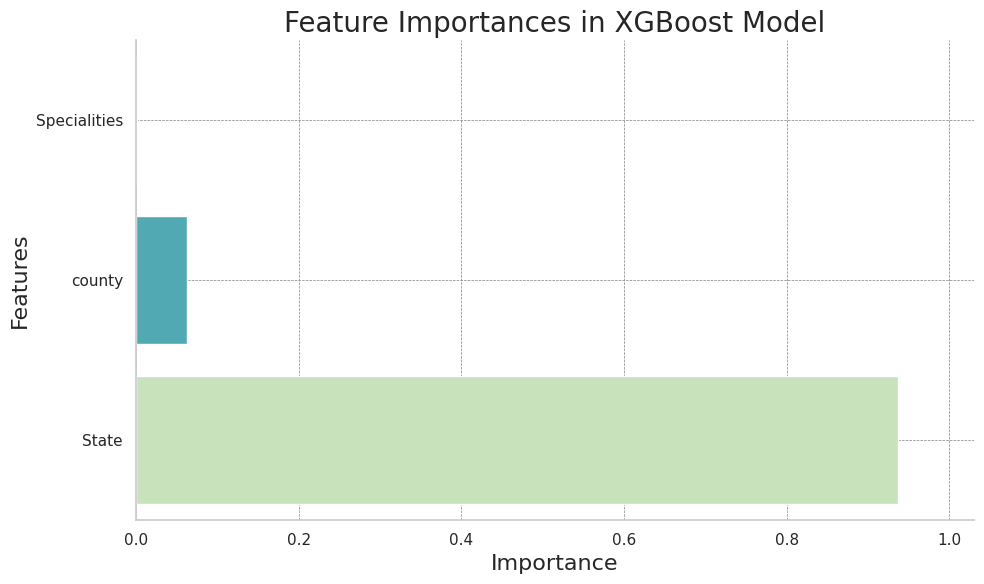

In [56]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas series to hold the feature names and their importance
importances = pd.Series(feature_importances, index=X.columns)

# Setting a style using seaborn
sns.set(style='whitegrid')

# Create a color palette that provides a color gradient based on the importance values
palette = sns.color_palette("YlGnBu", len(importances))

# Sort importances and color palette to match the order
sorted_indices = importances.argsort()
sorted_importances = importances[sorted_indices]
sorted_palette = [palette[i] for i in sorted_indices]

# Create a more appealing bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette=sorted_palette)

# Add a title and labels with larger font sizes
plt.title('Feature Importances in XGBoost Model', fontsize=20)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)

# Add grid lines and remove the top and right borders for a cleaner look
sns.despine(top=True, right=True, left=False, bottom=False)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')


# Adjust the x-axis limits if needed to make space for text
plt.xlim(0, max(importances.values) * 1.1)

# Show the plot
plt.tight_layout()
plt.show()